# The Connection Game: AI-Powered Puzzle Solver

This notebook demonstrates an automated solver for the "Connection" (or Plumber) puzzle. The system generates solvable pipe-connection grids and resolves them using a combination of bitwise modeling, graph decomposition, and informed search.

**Key Features:**
- **Bitwise Representation**: Tiles are modeled using 4 bits (Up, Right, Down, Left) for high-performance operations.
- **Problem Decomposition**: Uses `scipy.ndimage` for clustering to break large grids into smaller, independent sub-problems.
- **Smart Pruning**: Implements a "Trivial Cell" deduction engine to resolve most tiles before starting the search.

## 1. Environment Setup
Install the necessary dependencies (needed if you're running this project in Google Colab). This project relies on `scipy` for clustering and `matplotlib` for visualization.

In [ ]:
!pip install -r requirements.txt

## 2. Library & Module Imports
We load the core project components:
* `src.start`: Handles grid generation and randomization.
* `src.solver`: Contains the logic for trivial deductions and DFS.
* `display.display_grid`: Utility for graphical rendering.

In [2]:
import time

from src.start import *
from src.solver import *
from display.display_grid import *

## 3. Grid Configuration
Define the dimensions of the puzzle ($n \times m$). 
> **Note**: The generator starts from a valid "solved" state and applies controlled rotations to ensure that a solution always exists.

In [3]:
n, m = 50, 50

Grid 50x50 initialized successfully in 0.0080s


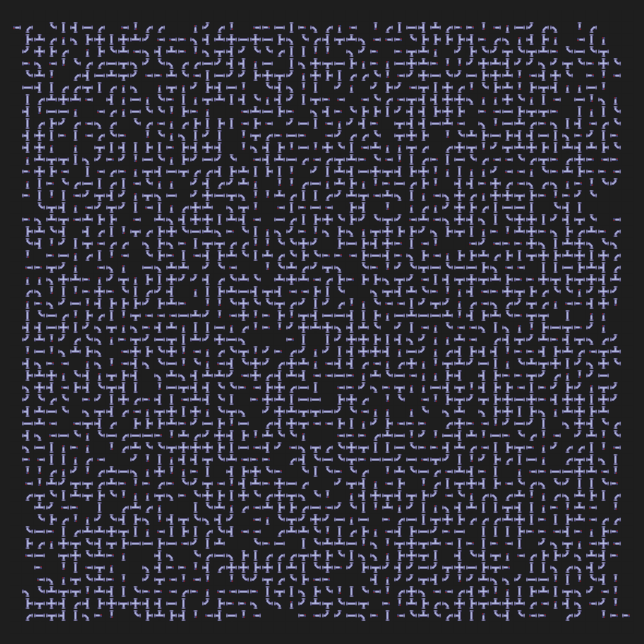

In [4]:
t = time.time()
grid = initiate(n, m)
print(f"Grid {n}x{m} initialized successfully in {time.time() - t:.4f}s")

cell_size = 12
tile_images = load_tile_images("display/images", cell_size)

# Display unsolved grid (with surrounding walls)
display_grid(grid, tile_images, cell_size)

## 4. Solving Strategy
The solver follows a three-tier approach to minimize computational overhead:

1. **Trivial Deduction**: Identifies tiles with only one valid orientation based on their neighbors (resolves up to 90% of the grid instantly).
2. **Clustering**: Isolates groups of unsolved tiles into independent clusters.
3. **Informed DFS**: For the remaining ambiguous tiles, a Depth-First Search explores the state space using the **Maximum Safe Connections** heuristic.

Starting automatic solving...
First cleanup of trivial cells...
78.72% of cells removed!
Automatic solving completed in 0.09s


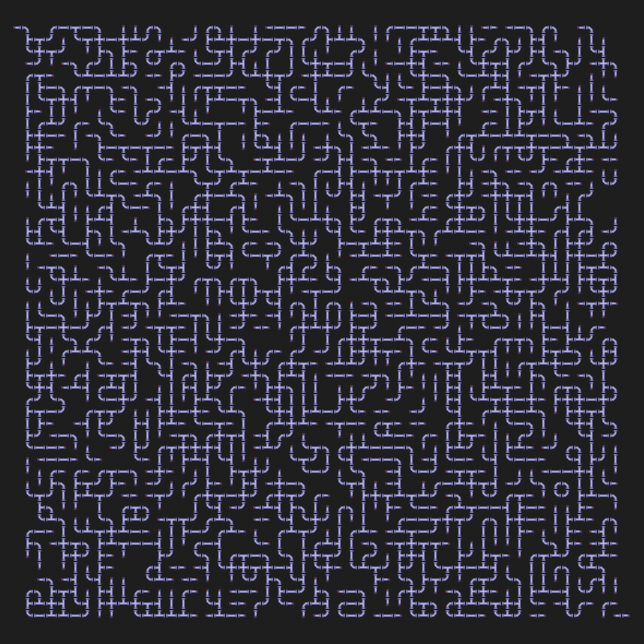

In [7]:
t = time.time()
print("Starting automatic solving...")
solved_grid = solve(grid)
print(f"Automatic solving completed in {time.time() - t:.2f}s")

# Display solved grid state
display_grid(solved_grid, tile_images, cell_size)